In [1]:
"""
Given a text corpus, generate a word cloud

start with https://www.datacamp.com/community/tutorials/wordcloud-python
"""

'\nGiven a text corpus, generate a word cloud\n\nstart with https://www.datacamp.com/community/tutorials/wordcloud-python\n'

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image, ImageOps
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
csv_path = "C:/Users/dori/artech/artech-2018/data/gov_files/f_07fc9ed5-1ac6-4752-a8c3-90781b3369ad.csv"
df = pd.read_csv(csv_path, usecols=["FullDescription"])
print(df.head())

                                     FullDescription
0  <p style="text-align: right;">מוזיאון ישראל הו...
1  <p style="text-align: right;">מוזיאון ישראל הו...
2  <p style="text-align: right;">מוזיאון ישראל הו...
3  <p style="text-align: right;">מוזיאון ישראל הו...
4  <p style="text-align: right;">מוזיאון ישראל הו...


In [4]:
def is_english(w):
    if ord(w.lstrip()[0]) < 128:
        return True
    else:
        return False

In [5]:
def invert_hebrew(w):
    if is_english(w):
        return w
    else:
        return w[::-1]

In [33]:
def black_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%, 0%)"

In [31]:
def calc_save_word_cloud(text=df.FullDescription[0].split(), out_path="../data/outputs/wordcloud_0.jpg", mask=None):
    word_list = [invert_hebrew(w) for w in text]
    text = ' '.join(word_list)
    wordcloud = WordCloud(max_words=1000, 
                          background_color="white", 
                          font_path="C:/Windows/Fonts/arial.ttf", 
                          mask=mask).generate(text)
    wordcloud.recolor(color_func = black_color_func)
    print("wordcloud type = ")
    print(type(wordcloud))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    xPix = mask.shape[0]
    yPix = mask.shape[1]

    xSize = 32 #inches
    ySize = xSize/xPix*yPix
    plt.gcf().set_size_inches(xSize,ySize)
    #plt.show()
    plt.savefig(out_path)

In [21]:
def get_image(image_path):
    res_im  = Image.open(image_path)
    #res_im  = res_im.rotate(-90)
    #imshow(np.asarray(res_im))
    return res_im

In [8]:
def get_mask(orig_im):
    eq_im = ImageOps.equalize(orig_im)
    gray_im = eq_im.convert(mode="LA")
    threshold=200
    bin_im = gray_im.point(lambda p: p > threshold and 255)
    imshow(bin_im)
    return bin_im

In [9]:
# from PIL import ImageOps
# dori_x, dori_y = contrast_applied.size
# print(dori_x)
# print(dori_y)
# wc_x, wc_y = wc_gray.size
# print(wc_x)
# delta_w = dori_x - wc_x
# delta_h = dori_y - wc_y
# padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
# new_wc = ImageOps.expand(wc_gray, padding)
# print(new_wc.size)
# print(contrast_applied.size)

In [10]:
# from PIL import ImageChops
# mult_im = ImageChops.multiply(new_wc, contrast_applied)
# imshow(mult_im)

In [11]:
# print(contrast_applied.mode)
# print(new_wc.mode)

In [12]:
def get_text():
    csv_path = "../data/gov_files/f_07fc9ed5-1ac6-4752-a8c3-90781b3369ad.csv"
    df = pd.read_csv(csv_path, usecols=["FullDescription"])
    df.dropna(inplace=True)
    return ' '.join(df.FullDescription).split()

In [ ]:
# def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#     return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

# #create the wordcloud object
# wordcloud = WordCloud(background_color='white',max_font_size = 50).generate(tmp)

# #change the color setting
# wordcloud.recolor(color_func = grey_color_func)

In [2]:
def get_cloud_mask(mask_path, dataset_path,out_path, input_text):
    mask_im = get_image(mask_path)
#     print("got image")
#     orig_im = orig_im.crop((500,0, 3500,3024))
#     #imshow(orig_im)
#     print("cropped")
#     print(orig_im.size)
#     mask_im = get_mask(orig_im)
    print("got mask")
    #mask_im = mask_im.rotate(180)
    imshow(mask_im)
    calc_save_word_cloud(text=input_text,
                         mask=np.asarray(mask_im),
                        out_path=out_path)
    print("saved cloud")
    #imshow(mask_im)

In [18]:
cached_text = get_text()

In [1]:
def get_image_w_cloud(image_path, dataset_path, out_path, input_text):
    orig_im = get_image(image_path)
    print("got image")
    orig_im = orig_im.crop((500,0, 3500,3024))
    #imshow(orig_im)
    print("cropped")
    print(orig_im.size)
    mask_im = get_mask(orig_im)
    print("got mask")
    imshow(mask_im)
    calc_save_word_cloud(text=input_text,
                         mask=np.asarray(mask_im),
                         out_path=out_path)
    print("saved cloud")
    #imshow(mask_im)

got mask
wordcloud type = 
<class 'wordcloud.wordcloud.WordCloud'>
saved cloud


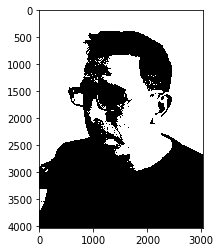

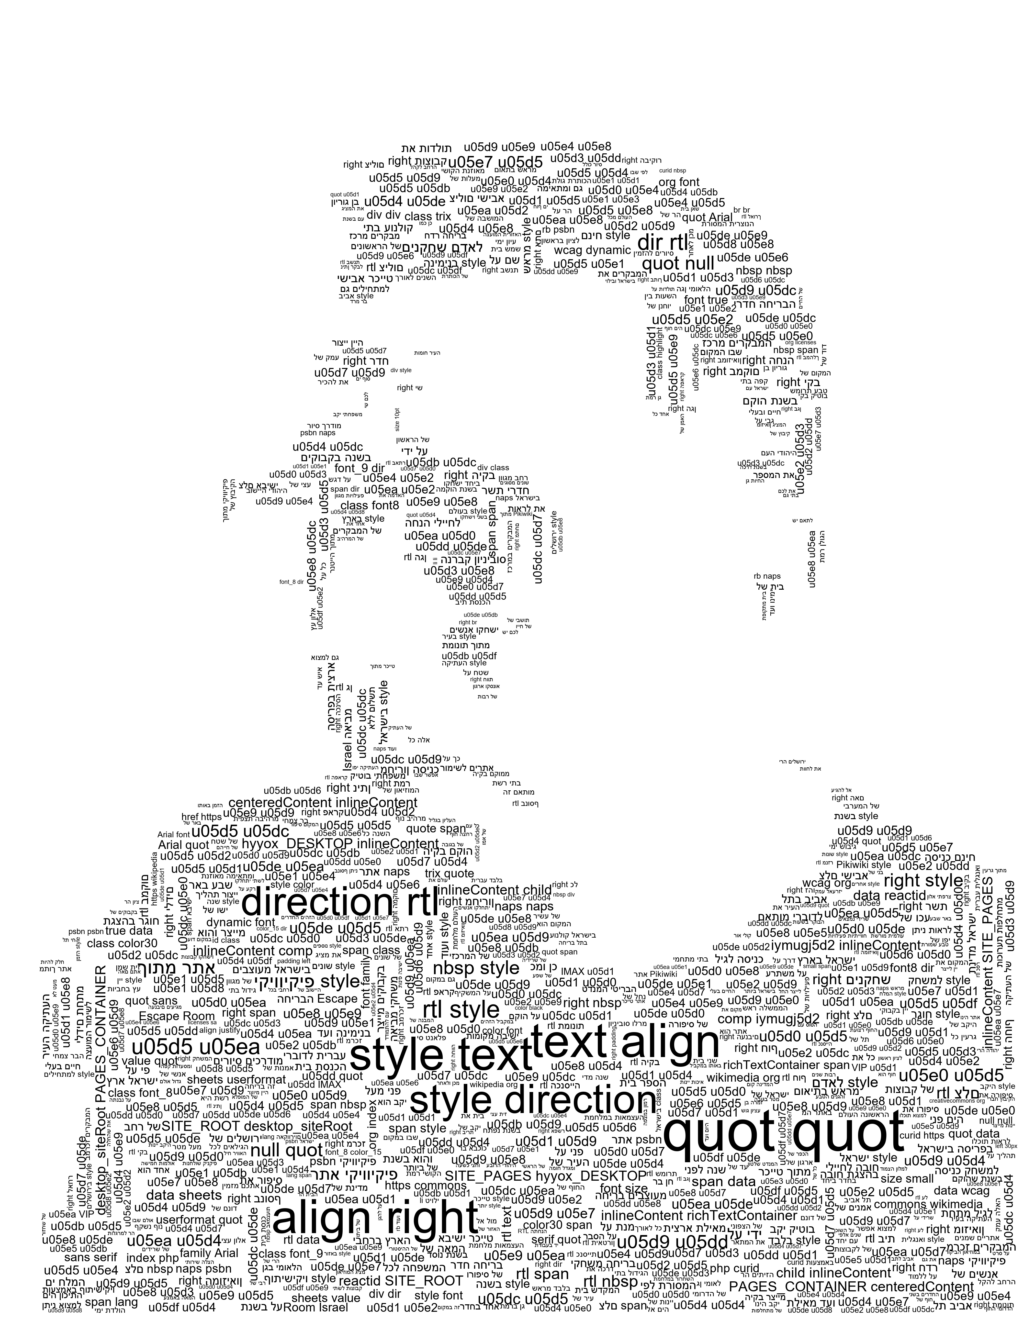

In [34]:
# dori_image_path = "../data/inputs/images/20181101_150630.jpg"
# get_image_w_cloud(dori_image_path, "")
mask_path = "../data/inputs/images/dark_dori_rgb.jpg"
out_path = "../data/outputs/wordcloud_mask_black.jpg"
get_cloud_mask(mask_path,"",out_path)

### 